<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 3

</h4>

# Personal Data

In [5]:
# Set your student number
student_number = 
Name = ''
Last_Name = ''

SyntaxError: invalid syntax (3021276715.py, line 2)

# Autoencoders (25 Points)

In this problem, you should implement an autoencoder network, which generates an image presenting the next digit of the input digit. Here are some examples:

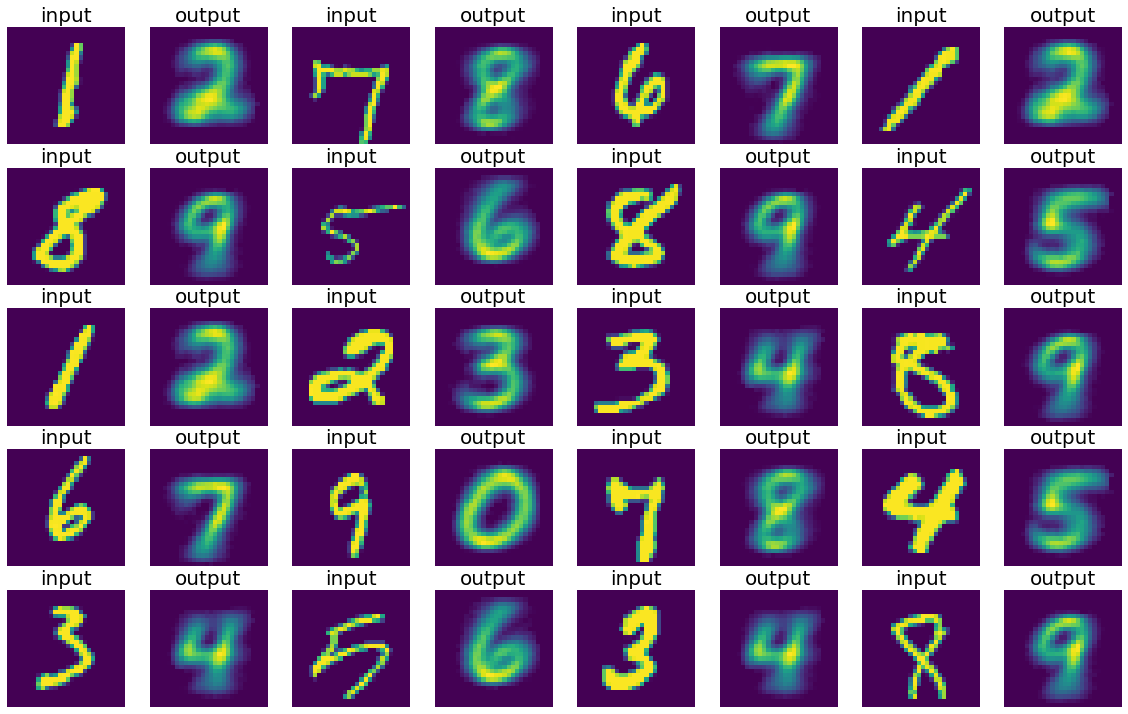

You should use the MNIST dataset, and the ground-truth for each example is provided by a helper function. Make sure to put the `ae_helper.py` file next to this notebook to use the helper function.

## Get the data

Get the data and split them into training, validation, and test sets, by running the following cell. `X` is the input images, `Y` is the ground-truth for each input, and `y` is the input's label.

In [9]:
"""
AUTHOR:         Ahmad Salimi (https://github.com/ahmadsalimi)
"""


from typing import Tuple

from sklearn.datasets import fetch_openml
import numpy as np
import os
import torch
from tqdm import tqdm


def get_data() -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """ Downloads the MNIST data and processes the data for autoencoder problem.
    
    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: A tuple of input images,
            output images (input + 1), and the label of input images
    """
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True)
    X, y = X.values, y.values
    X = X.reshape(-1, 28, 28).astype('float32') / 255.0
    y = y.astype(int)

    Y = np.zeros_like(X)
    ind = y.argsort()
    X, y = X[ind], y[ind]

    c = 0
    for i in range(10):
        s = (y == i).sum()
        ss = (y == (i + 1) % 10).sum()
        if s <= ss:
            Y[c:c+s] = X[c+s:c+2*s]
        elif i < 9:
            Y[c:c+ss] = X[c+s:c+s+ss]
            Y[c+ss:c+s] = X[c+s:c+2*s-ss]
        else:
            Y[c:c+ss] = X[:ss]
            Y[c+ss:c+s] = X[:s-ss]
        c += s

    current_state = np.random.get_state()

    np.random.seed(10)
    ind = np.random.permutation(X.shape[0])
    X, Y, y = X[ind], Y[ind], y[ind]

    np.random.set_state(current_state)

    return X, Y, y

def init_mnist_subset_directories(mnist_dataset, dataset_path, subset_size=5000):
    mnist_subset = torch.utils.data.Subset(mnist_dataset, torch.randperm(len(mnist_dataset))[:subset_size])

    os.mkdir(dataset_path)
  
    for idx, (x, y) in enumerate(tqdm(mnist_subset)):
        label_path = os.path.join(dataset_path, str(y))
        if not os.path.exists(label_path):
            os.mkdir(label_path)
        torch.save(x, os.path.join(label_path, 'data_'+str(idx)+'.pth'))

from sklearn.model_selection import train_test_split
X, Y, y = get_data()

X_train, X_test, Y_train, Y_test, y_train, y_test = train_test_split(X, Y, y, test_size=0.2, random_state=17)
X_train, X_val, Y_train, Y_val, y_train, y_val = train_test_split(X_train, Y_train, y_train, test_size=0.1, random_state=17)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Design your model

Please Implement your autoencoder model below. You MUST implement your model using the `torch` package. The model should input a batch of images and output the generated images for the whole batch. Your model can be consist of fully connected layers (using linear layers), but using fully-convolutional models has extra points.

In [ ]:
#### IMPLEMENT YOUR MODEL ####
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.nn import functional as F

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # your code here

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # your code here


## The dataset class, and the dataloaders

The following cells implement the dataset class and create the data loaders for training and validation sets. Feel free to modify the batch size for each data loader.

In [10]:
from typing import Tuple
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class MnistNextDigitDataset(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
        self.y = torch.from_numpy(y)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, i: int) -> Tuple[torch.Tensor, ...]:
        return self.X[i], self.Y[i], self.y[i]

In [11]:
train_dataloader = DataLoader(
    MnistNextDigitDataset(X_train, Y_train, y_train),
    batch_size=512,
    shuffle=True
)
val_dataloader = DataLoader(
    MnistNextDigitDataset(X_val, Y_val, y_val),
    batch_size=1024,
    shuffle=False
)

In [ ]:
# place for your custom functions for training and evaluation of the autoencoder

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def train_autoencoder(model: nn.Module, optimizer: torch.optim.Optimizer, dataloader: DataLoader) -> float:

    # your code here

    return epoch_loss


def eval_autoencoder(model: nn.Module, dataloader: DataLoader) -> float:

    # your code here
    
    return epoch_loss



## Instantiate the model and optimizer

Instantiate your model and optimizer in the following cell. Feel free to choose the optimizer and its configurations such as learning rate, decay, etc.

In [ ]:
#### INSTANTIATE YOUR MODEL AND OPTIMIZER ####
ae = AutoEncoder().to(device=device)
optimizer = #...

## Train your autoencoder

Write your training/validation loop in the following cell for an arbitrary number of epochs (until convergence is detected). Make sure to use proper and readable logging containing training and validation metrics for each epoch. Select and store the state dictionary of the best epoch model according to the metrics.

In [ ]:
#### IMPLEMENT YOUR TRAIN/VAL LOOP ####

## Load the state dictionary of the best epoch

Load the state dictionary of the best epoch model into the model object.

In [ ]:
#### LOAD THE BEST EPOCH STATE DICTIONARY ####

## Visualize your model

Select 40 examples from the test set and visualize the input and output of the model for them (See the examples at the beginning of the notebook).

In [ ]:
#### VISUALIZE YOUR MODEL ####

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
There was a problem when trying to write in your cache folder (/Users/alinikkhah/.cache/huggingface/hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


Epoch [1/20], Loss: 0.0561
Epoch [2/20], Loss: 0.0533
Epoch [3/20], Loss: 0.0550
Epoch [4/20], Loss: 0.0517
Epoch [5/20], Loss: 0.0544
Epoch [6/20], Loss: 0.0485
Epoch [7/20], Loss: 0.0534
Epoch [8/20], Loss: 0.0564
Epoch [9/20], Loss: 0.0558
Epoch [10/20], Loss: 0.0572
Epoch [11/20], Loss: 0.0524
Epoch [12/20], Loss: 0.0451
Epoch [13/20], Loss: 0.0510
Epoch [14/20], Loss: 0.0537
Epoch [15/20], Loss: 0.0543
Epoch [16/20], Loss: 0.0495
Epoch [17/20], Loss: 0.0498
Epoch [18/20], Loss: 0.0470
Epoch [19/20], Loss: 0.0526
Epoch [20/20], Loss: 0.0502


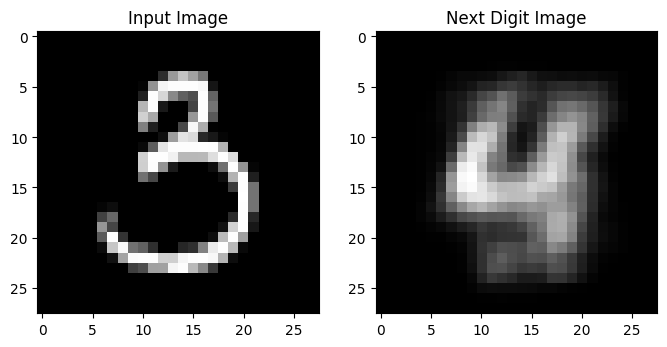

In [13]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST data
X, Y, _ = get_data()

# Convert to PyTorch tensors
X_tensor = torch.tensor(X).unsqueeze(1)
Y_tensor = torch.tensor(Y).unsqueeze(1)

# Create DataLoader
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1), # 32x14x14
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # 64x7x7
            nn.ReLU(),
            nn.Flatten(), # 64*7*7
            nn.Linear(64*7*7, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 64*7*7),
            nn.ReLU(),
            nn.Unflatten(1, (64, 7, 7)),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), # 32x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1), # 1x28x28
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    for batch in dataloader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), 'autoencoder.pth')

# Function to generate the next digit image
def generate_next_digit(model, input_image):
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(input_image).unsqueeze(0).unsqueeze(0).float()
        output_image = model(input_tensor).squeeze().numpy()
    return output_image

# Test the function
input_image = X[0] # Example input image (digit 0)
next_digit_image = generate_next_digit(model, input_image)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Next Digit Image')
plt.imshow(next_digit_image, cmap='gray')
plt.show()


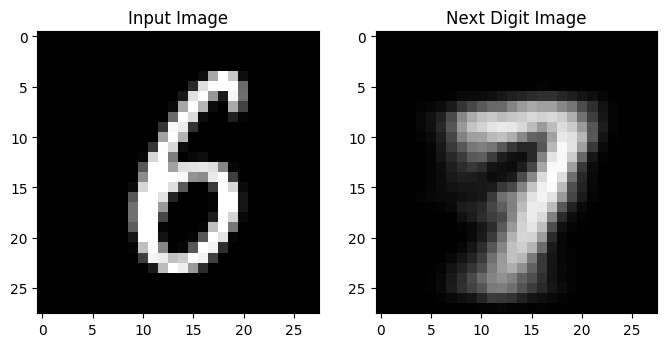

In [14]:
# Test the function
input_image = X[5] # Example input image (digit 0)
next_digit_image = generate_next_digit(model, input_image)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Next Digit Image')
plt.imshow(next_digit_image, cmap='gray')
plt.show()

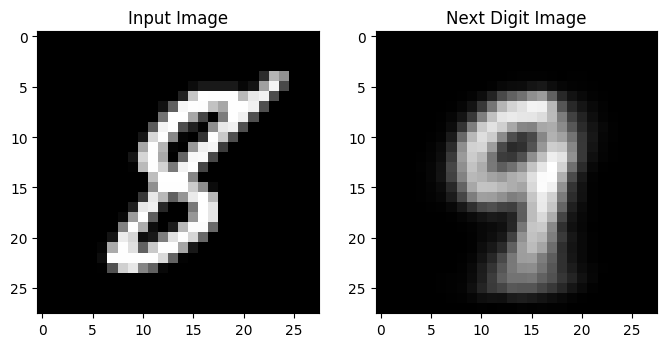

In [15]:
# Test the function
input_image = X[10] # Example input image (digit 0)
next_digit_image = generate_next_digit(model, input_image)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Next Digit Image')
plt.imshow(next_digit_image, cmap='gray')
plt.show()

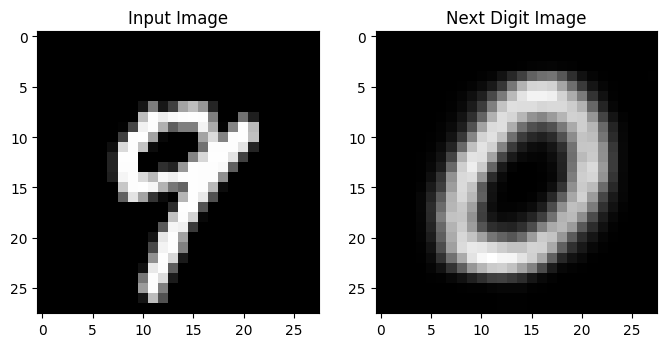

In [16]:
# Test the function
input_image = X[30] # Example input image (digit 0)
next_digit_image = generate_next_digit(model, input_image)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Next Digit Image')
plt.imshow(next_digit_image, cmap='gray')
plt.show()

In [ ]:
class AutoencoderV1(nn.Module):
    def __init__(self):
        super(AutoencoderV1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, 3, stride=2, padding=1), # 64x14x14
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1), # 128x7x7
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=2, padding=1), # 256x4x4
            nn.ReLU(),
            nn.Flatten(), # 256*4*4
            nn.Linear(256*4*4, 256),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 256*4*4),
            nn.ReLU(),
            nn.Unflatten(1, (256, 4, 4)),
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1), # 128x7x7
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1), # 64x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, 3, stride=2, padding=1, output_padding=1), # 1x28x28
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


class AutoencoderV2(nn.Module):
    def __init__(self):
        super(AutoencoderV2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, 3, stride=2, padding=1), # 64x14x14
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1), # 128x7x7
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, stride=2, padding=1), # 256x4x4
            nn.ReLU(),
            nn.Conv2d(256, 512, 3, stride=2, padding=1), # 512x2x2
            nn.ReLU(),
            nn.Flatten(), # 512*2*2
            nn.Linear(512*2*2, 512),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(512, 512*2*2),
            nn.ReLU(),
            nn.Unflatten(1, (512, 2, 2)),
            nn.ConvTranspose2d(512, 256, 3, stride=2, padding=1, output_padding=1), # 256x4x4
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1), # 128x7x7
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1), # 64x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, 3, stride=2, padding=1, output_padding=1), # 1x28x28
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Function to train the model
def train_model(model, dataloader, num_epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    for epoch in range(num_epochs):
        for batch in dataloader:
            inputs, targets = batch
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    torch.save(model.state_dict(), f'{model.__class__.__name__}.pth')

# Load and preprocess the MNIST data
X, Y, _ = get_data()

# Convert to PyTorch tensors
X_tensor = torch.tensor(X).unsqueeze(1)
Y_tensor = torch.tensor(Y).unsqueeze(1)

# Create DataLoader
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Initialize and train the models
model_v1 = AutoencoderV1()
model_v2 = AutoencoderV2()

print("Training AutoencoderV1")
train_model(model_v1, dataloader, num_epochs=50)

print("Training AutoencoderV2")
train_model(model_v2, dataloader, num_epochs=50)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training AutoencoderV1
Epoch [1/50], Loss: 0.0564
